# Asian Port Analysis

### Objectives of this project: 

- Calculate the cumulative price (in U.S. dollars) of cargo each destintation port has transported through the given period.
- Calculate the most expensive and least expensive cargo transported through each destination port.
- Visualize the amount of sales and amount of cargo per day per each destination port
- Visualize top 10 items per port

First step is to import the **pandas**,**Matplotlib**, and **datetime** libraries and look at the data we will be analyzing.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
df = pd.read_csv(r'/Users/durazno/Downloads/shipping_data.csv')
df.head(5)

,name,price ($),weight (kg),length (m),width (m),height (m),shipment date,destination port
0,Camera Bag,37.66,1.10,0.40,0.39,0.26,2023-03-19,Port of Singapore (Singapore)
1,Portable Bluetooth Keyboard,144.65,0.39,0.11,0.06,0.03,2023-03-21,Port of Busan (South Korea)
2,Large Flat Rate Box,38.57,0.97,0.79,0.55,0.35,2023-03-25,Port of Tianjin (China)
3,Ceramic Tiles,10.34,6.22,0.36,0.37,0.02,2023-03-15,Port of Shanghai (China)
4,Garden Hose,21.63,1.18,17.77,0.27,0.13,2023-03-25,Port of Tianjin (China)


#### Data set details:
- **name**: name of item
- **price ($)**: price of item in dollar amount
- **weight(kg)**: weight of item in kilograms
- **length (m)**: length of item in meters
- **width (m)**: width of titem in meters
- **height (m)**: height of item in meters
- **shipment date**: the date the item arrived at destination port
- **destination port**: location where item arrived


Next step is to look at what kind of data we have and decide what we need to clean. I will begin by looking for **incontinuities, corruptions, and errors.**

In [10]:
df.dtypes

name                 object
price ($)           float64
weight (kg)         float64
length (m)          float64
width (m)           float64
height (m)          float64
shipment date        object
destination port     object
dtype: object

I will make the shipment date column into datetime format.

In [3]:
df['shipment date'] = pd.to_datetime(df['shipment date'], format = '%Y-%m-%d')
df.dtypes

name                        object
price ($)                  float64
weight (kg)                float64
length (m)                 float64
width (m)                  float64
height (m)                 float64
shipment date       datetime64[ns]
destination port            object
dtype: object

In [45]:
count_of_unique=df['name'].unique()
n=1
for i in count_of_unique:
    n=n+1
print(n)

292


There are **292 unique items** in the **name** column ranging from food, to cellphones, to boots, to cars.

In [41]:
df['destination port'].unique()

array(['Port of Singapore (Singapore)', 'Port of Busan (South Korea)',
       'Port of Tianjin (China)', 'Port of Shanghai (China)',
       'Port of Tokyo (Japan)', nan], dtype=object)

There are 5 unique destination ports, some of the records have no value for their destination port.

Next I will check for **null values.**

In [13]:
print(df['destination port'].isnull().sum())
print(df['price ($)'].isnull().sum())
print(df['weight (kg)'].isnull().sum())
print(df['length (m)'].isnull().sum())
print(df['width (m)'].isnull().sum())
print(df['shipment date'].isnull().sum())

26
0
13
184
0
2638


There are some null values for the destination port, weight, length, and shipment date columns.

I tried to cross match cargo records in order to find missing weight and length records but could not find any.

I also tried to find any patterns between price, weight, length, and width in cargo which had missing shipment dates and destination ports and non missing but couldn't find a pattern.

The records with missing destination ports will affect this analyses the most since I will be analyzing and comparing each port. These cargo records will be excluded from my analysis unless further data is discovered in which I can fill in the missing destination port information.

Records with missing weight, length, and shipment date columns will be included since these categories do not affect the analysis of indivual port records.

Next step is to calculate the time period for these records. I will check the first and last record of each destination port in order to conclude the time period.

In [16]:
df.groupby(['destination port'])['shipment date'].min()

destination port
Port of Busan (South Korea)     2023-03-12
Port of Shanghai (China)        2023-03-12
Port of Singapore (Singapore)   2023-03-12
Port of Tianjin (China)         2023-03-12
Port of Tokyo (Japan)           2023-03-12
Name: shipment date, dtype: datetime64[ns]

In [17]:
df.groupby(['destination port'])['shipment date'].max()

destination port
Port of Busan (South Korea)     2023-03-28
Port of Shanghai (China)        2023-03-28
Port of Singapore (Singapore)   2023-03-28
Port of Tianjin (China)         2023-03-28
Port of Tokyo (Japan)           2023-03-28
Name: shipment date, dtype: datetime64[ns]

The time periods match across all the detination ports. The time period we will be analyzing is of **17 days.**

Now I can begin the first objective. Calculate the **total price amount (in U.S. dollars)** of all the cargo transported through each destination port during the 17 day period.

In [28]:
cumulative_price = df.groupby(['destination port']).sum()
cumulative_price.drop(['length (m)', 'weight (kg)', 'width (m)', 'height (m)'], axis = 1) 

,price ($)
destination port,
Port of Busan (South Korea),2.257314e+08
Port of Shanghai (China),2.068017e+08
Port of Singapore (Singapore),2.075872e+08
Port of Tianjin (China),2.466837e+08
Port of Tokyo (Japan),2.196962e+08


Text(0.5, 1.0, 'Total Amount($) of Cargo Passed Through Each Port')

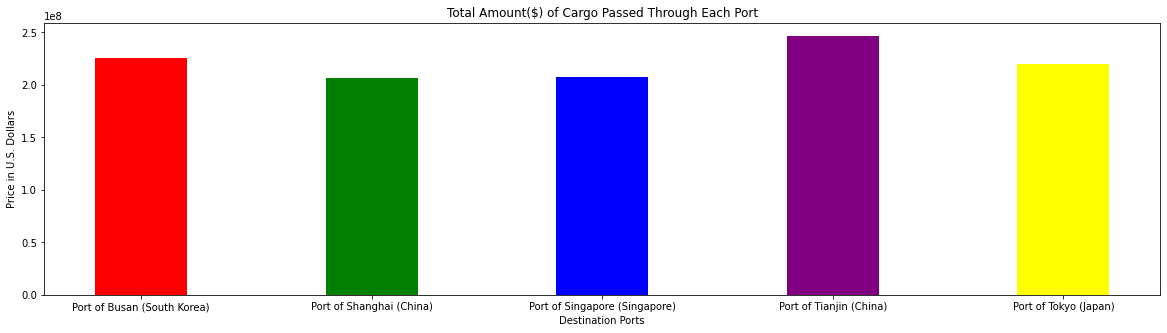

In [84]:
list_cities=['Port of Busan (South Korea)', 'Port of Shanghai (China)', 'Port of Singapore (Singapore)', 'Port of Tianjin (China)' , 'Port of Tokyo (Japan)']
xcor = [1,2,3,4,5]

fig, ax = plt.subplots(1, 1, figsize=(20,5))

plt.bar(xcor, cumulative_price['price ($)'], tick_label = list_cities,width = 0.4, color = ['red', 'green', 'blue', 'purple', 'yellow'])

plt.xlabel('Destination Ports') 
plt.ylabel('Price in U.S. Dollars') 
plt.title("Total Amount($) of Cargo Passed Through Each Port")

From the figures above the destination port of **Tianjin** has received the largest U.S. dollar amount of cargo at roughly **$247 trillion dollars in 17 days.** The destination port of **Shanghai** has received the least amount of cargo based on it's U.S.. dollar amount at roughly **2 trillion dollars**.

Now I can begin the second objective. Calculate the most expensive and least expensive cargo transported through each destination port.

In [44]:
most_expensive = df.groupby(['destination port'])['price ($)'].transform(max) == df['price ($)']
df[most_expensive]

,name,price ($),weight (kg),length (m),width (m),height (m),shipment date,destination port
37756,Sports Car,1998160.05,1532.83,4.92,1.93,1.43,2023-03-17,Port of Tokyo (Japan)
60900,Sports Car,1999706.53,1481.84,4.68,1.99,1.50,NaT,Port of Tianjin (China)
109804,Sports Car,1989497.52,1309.47,4.37,1.98,1.37,2023-03-18,Port of Singapore (Singapore)
192315,Sports Car,1971771.58,1038.84,4.99,1.96,1.58,2023-03-23,Port of Shanghai (China)
224634,Sports Car,1988565.53,1196.92,4.71,1.90,1.52,2023-03-15,Port of Busan (South Korea)


In [48]:
least_expensive = df.groupby(['destination port'])['price ($)'].transform(min) == df['price ($)']
df[least_expensive]

,name,price ($),weight (kg),length (m),width (m),height (m),shipment date,destination port
106,Can of Beans,1.00,0.25,0.14,0.11,0.14,2023-03-16,Port of Shanghai (China)
9155,Can of Beans,1.02,0.28,0.11,0.12,0.14,2023-03-17,Port of Tianjin (China)
59938,Can of Beans,1.01,0.45,0.16,0.11,0.15,2023-03-21,Port of Busan (South Korea)
113561,Can of Beans,1.00,0.26,0.19,0.12,0.14,2023-03-28,Port of Singapore (Singapore)
185775,Can of Beans,1.01,0.24,0.18,0.15,0.12,2023-03-28,Port of Tokyo (Japan)
219164,Can of Beans,1.00,0.41,0.14,0.13,0.11,2023-03-16,Port of Singapore (Singapore)


As seen in the figures above the **most expensive item** transpoted through all the ports were **sports cars**. While the **least expensive item** transported through all the destination ports were a **can of beans**. (Note that the port of Singapore has two records listed because in each of the records they were the cheapest item.)

Moving on to the next objective. Visualize the **amount of sales per day** per each destination port

In [5]:
dates=pd.date_range(start='03-12/2023', end='03-28/2023', freq = 'D').strftime("%m-%d")

Text(0.5, 1.0, 'Amount of Cargo Transported per Day ')

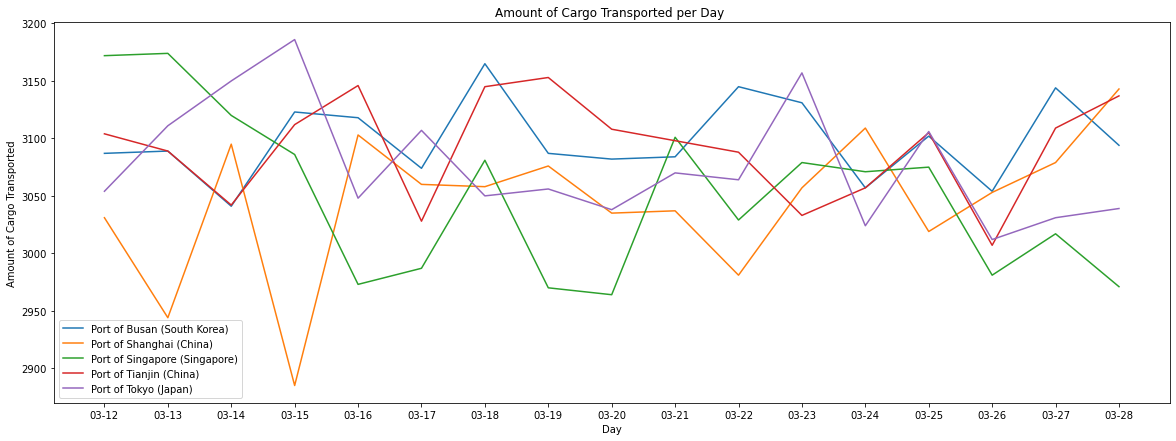

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(20,7))

for i in list_cities:
    plotx=df.loc[df['destination port']== i].groupby(['destination port', 'shipment date']).count()
    plt.plot(dates, plotx['price ($)'], label = i)
    
plt.legend()
plt.xlabel('Day') 
plt.ylabel('Amount of Cargo Transported') 
plt.title("Amount of Cargo Transported per Day ")

From the figure above we can see that the port of Shanghai had a big dip on March 15th while most of the other ports were on an incline. The port of **Shanghai performs the worst** in comparison to the other ports while it can be said that the ports of **Busan and Tianjin perform objectively better** than the other ports.

Second to last objective is to visualize the **cash amount** of items transported through the destination ports.

Text(0.5, 1.0, 'Amount of $ Transported per Day ')

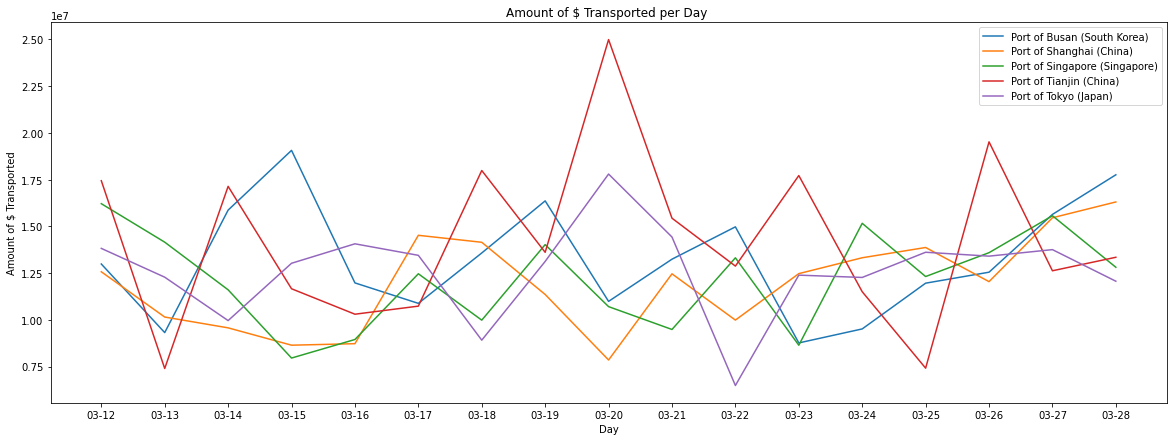

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(20,7))

for i in list_cities:
    plotx=df.loc[df['destination port']== i].groupby(['destination port', 'shipment date']).sum()
    plt.plot(dates, plotx['price ($)'], label = i)
    
plt.legend()
plt.xlabel('Day') 
plt.ylabel('Amount of $ Transported') 
plt.title("Amount of $ Transported per Day ")

From the figure above, the port of **Tianjin had a large influx** of U.S. dollars on March 20th but it did not recieive a large amount of items. It can be assumed that theport of Tianjin accepted some items of high value. 
The port of **Shangai had low income** on March the 15th as well as the 20th which can be **corroborated** on the above graph.

Last objecive is to visualize the **top 10 items transported** per destination port.

Text(0.5, 1.0, 'Top 10 Items Transported to Ports')

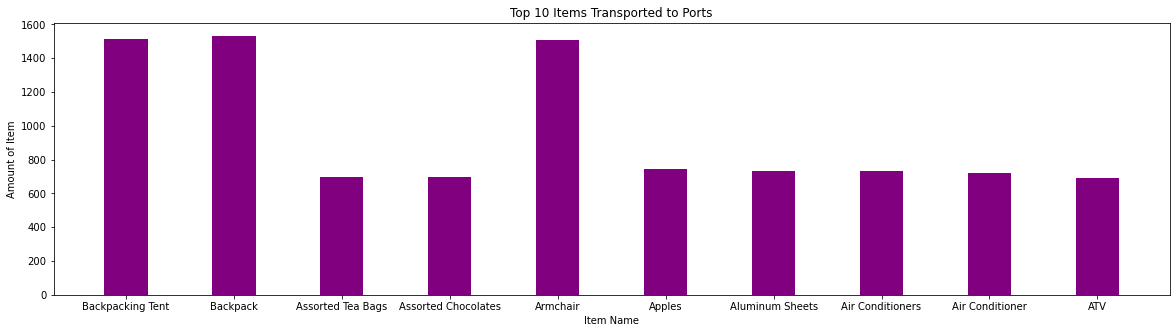

In [127]:
top_ten=df.groupby(['name']).count().head(10).sort_values(by=['name'], ascending = False)
xcor = [1,2,3,4,5,6,7,8,9,10]
fig, ax = plt.subplots(1, 1, figsize=(20,5))
plt.bar(xcor, top_ten['price ($)'], tick_label = p.index, width = 0.4, color = ['purple'])
plt.xlabel('Item Name') 
plt.ylabel('Amount of Item') 
plt.title("Top 10 Items Transported to Ports")

From the above figure, the **top three** items were backpacking tents, backpacks, and armchairs.